### Run stuff

In [4]:
%%bash --bg
#create several player processes. Each process plays games and saves results
#the loop below spawns 10 players. If you are doing this on a laptop, reducing to 2-4 is okay
for i in `seq 1 2`; 
#for i in range(4):
do
        THEANO_FLAGS=device=cpu,floatX=float32 python2 tinyverse atari.py play -b 3 --port 6789 &
done  

Starting job # 0 in a separate thread.


In [6]:
%%bash --bg
#create learner process on GPU. batch size 10
THEANO_FLAGS=device=gpu0,floatX=float32 python2 tinyverse atari.py train -b 5 --port 6789 &

Starting job # 2 in a separate thread.


### View stuff

In [18]:
%%bash
#play 5 games, show results (re-run whenever you want score)
#Tris particular score was recorded 7 hours through training
python2 tinyverse atari.py eval -n 3 --port 6789

Episode finished after 838 timesteps with reward=20
Episode finished after 795 timesteps with reward=20
Episode finished after 849 timesteps with reward=20


Using gpu device 0: GeForce GTX 960M (CNMeM is enabled with initial size: 20.0% of memory, cuDNN 5105)
[2017-01-19 19:35:32,317] Making new env: Skiing-v0
[2017-01-19 19:35:32,405] DEPRECATION WARNING: env.spec.timestep_limit has been deprecated. Replace your call to `env.spec.timestep_limit` with `env.spec.tags.get('wrapper_config.TimeLimit.max_episode_steps')`. This change was made 12/28/2016 and is included in version 0.7.0
[2017-01-19 19:35:32,406] Clearing 6 monitor files from previous run (because force=True was provided)
[2017-01-19 19:35:33,862] Starting new video recorder writing to /home/axcel/Documents/records/openaigym.video.0.19250.video000000.mp4
[2017-01-19 19:35:39,468] Starting new video recorder writing to /home/axcel/Documents/records/openaigym.video.0.19250.video000001.mp4
[2017-01-19 19:35:50,536] Finished writing results. You can upload them to the scoreboard via gym.upload('/home/axcel/Documents/records')


### Upload stuff

In [19]:
#same as python tinyverse skiing_original_reward.py eval -n 100

from skiing_original_reward import make_experiment
from tinyverse.database import Database
db = Database(port=6789)
exp = make_experiment(db)

exp.evaluate(20)

[2017-01-19 19:35:54,472] Making new env: Skiing-v0
[2017-01-19 19:35:54,573] DEPRECATION WARNING: env.spec.timestep_limit has been deprecated. Replace your call to `env.spec.timestep_limit` with `env.spec.tags.get('wrapper_config.TimeLimit.max_episode_steps')`. This change was made 12/28/2016 and is included in version 0.7.0
[2017-01-19 19:35:54,579] Clearing 6 monitor files from previous run (because force=True was provided)
[2017-01-19 19:35:54,624] Starting new video recorder writing to /home/axcel/Documents/records/openaigym.video.2.13207.video000000.mp4
[2017-01-19 19:36:02,346] Starting new video recorder writing to /home/axcel/Documents/records/openaigym.video.2.13207.video000001.mp4


Episode finished after 881 timesteps with reward=-4406.0
Episode finished after 726 timesteps with reward=-3609.0
Episode finished after 769 timesteps with reward=-3861.0
Episode finished after 836 timesteps with reward=-4253.0
Episode finished after 820 timesteps with reward=-4024.0
Episode finished after 753 timesteps with reward=-3703.0
Episode finished after 878 timesteps with reward=-4357.0


[2017-01-19 19:36:35,213] Starting new video recorder writing to /home/axcel/Documents/records/openaigym.video.2.13207.video000008.mp4


Episode finished after 780 timesteps with reward=-3936.0
Episode finished after 848 timesteps with reward=-4223.0
Episode finished after 800 timesteps with reward=-3964.0
Episode finished after 781 timesteps with reward=-4512.0
Episode finished after 861 timesteps with reward=-4263.0
Episode finished after 840 timesteps with reward=-4175.0
Episode finished after 767 timesteps with reward=-3889.0
Episode finished after 946 timesteps with reward=-4726.0
Episode finished after 802 timesteps with reward=-4047.0
Episode finished after 796 timesteps with reward=-4449.0
Episode finished after 732 timesteps with reward=-4629.0
Episode finished after 850 timesteps with reward=-4217.0


[2017-01-19 19:37:30,246] Finished writing results. You can upload them to the scoreboard via gym.upload('/home/axcel/Documents/records')


Episode finished after 774 timesteps with reward=-3921.0


[-4406.0,
 -3609.0,
 -3861.0,
 -4253.0,
 -4024.0,
 -3703.0,
 -4357.0,
 -3936.0,
 -4223.0,
 -3964.0,
 -4512.0,
 -4263.0,
 -4175.0,
 -3889.0,
 -4726.0,
 -4047.0,
 -4449.0,
 -4629.0,
 -4217.0,
 -3921.0]

In [13]:
import gym
gym.upload("./records/",
           api_key='sk_MQYhR3ACSIGgbXxckpcCrg')

[2017-01-19 19:08:34,909] [Skiing-v0] Uploading 100 episodes of training data
[2017-01-19 19:08:37,722] [Skiing-v0] Uploading videos of 5 training episodes (622558 bytes)
[2017-01-19 19:08:41,618] [Skiing-v0] Creating evaluation object from ./records/ with learning curve and training video
[2017-01-19 19:08:41,963] 
****************************************************
You successfully uploaded your evaluation on Skiing-v0 to
OpenAI Gym! You can find it at:

    https://gym.openai.com/evaluations/eval_Bds4ysfLRo6xtsKAFg6vQ

****************************************************


# Some auxilary monitoring

* The dashboard we used throughout training. A bit messy. Displays average reward per timestep * 5000.

In [16]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import theano
import theano.tensor as T
import pickle

import atari
from tinyverse.database import Database

db = Database(port=6789)
experiment=atari.make_experiment(db)


('n_sessions:', 16374)


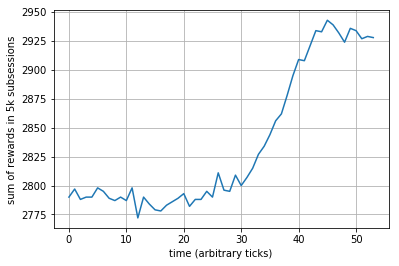

KeyboardInterrupt: 

In [17]:
avg_reward_per_session = []

from IPython.display import clear_output
while True:
    if db.redis.exists("weights"):
        weights = db.loads(db.redis.get('weights'))
        if any(map(np.any,map(np.isnan,weights))):
            print("Weights broken!!!")
    
    print("n_sessions:",db.redis.llen("sessions"))
    plt.plot(avg_reward_per_session)
    plt.xlabel("time (arbitrary ticks)")
    plt.ylabel("sum of rewards in 5k subsessions")
    plt.grid()
    plt.show()
    
    
    R=0
    for i in range(5000)[::-1]:
        s,a,r,d,m = db.loads(db.redis.lindex('sessions',i))
        R += sum(r)
    avg_reward_per_session.append(R)
    clear_output(True)
    

In [4]:
!ps aux | grep tinyverse

axcel    12853  0.0  0.0  13692  2748 pts/3    Ss+  18:45   0:00 /usr/bin/sh -c ps aux | grep tinyverse
axcel    12855  0.0  0.0  10756  2188 pts/3    S+   18:45   0:00 grep tinyverse


# Dump weights

In [1]:
import theano

Using gpu device 0: GeForce GTX 960M (CNMeM is enabled with initial size: 20.0% of memory, cuDNN 5105)


In [1]:
from tinyverse import Database
from atari import AtariA3C
db = Database(port=6789)
agent = AtariA3C(db).agent
db.load_all_params(agent)

Using gpu device 0: GeForce GTX 960M (CNMeM is enabled with initial size: 20.0% of memory, cuDNN 5105)


In [2]:
from agentnet.utils.persistence import save,load
#save(agent.policy,"weights_8h_training.pcl")
load(agent.policy, "weights_8h_training.pcl")

In [3]:
db.save_all_params(agent)

# massacre processes

* Will soon make a cleaner version through ```python tinyverse clear```

In [11]:
!kill -9 $(ps aux | grep tinyverse | awk '{print $2}') #uncomment to hard kill all
from tinyverse.database import Database
db = Database()
for key in db.redis.keys():
    db.redis.delete(key)